In [3]:
cluster = 'a2744'
zclus = {'a2744' : 0.308,
         'm0416' : 0.396}
pgals = {'a2744' : [1.689791e-01, 1.965115e+00, 2.0],
        'm0416' : [3.737113e-01, 1.322081e+00, 2.0]}
nclus = {'a2744': "Abell 2744",
         'm0416' : "MACS 0416"}

import sys
utils = 'C:\\Users\\Jackson\\Jupyter projects\\Master\\Utility\\'
sys.path.insert(0, utils)

root = 'C:\\Users\\Jackson\\Jupyter projects\\'
sys.path.insert(0, root)
filebase = 'C:\\Users\\Jackson\\Jupyter projects\\Master\\' + nclus[cluster] + "\\Files\\"

import numpy as np
import numpy.ma as ma
from astropy.cosmology import FlatLambdaCDM
from os import listdir
from os.path import isfile, join
import MCUtil as MC
import DeltaSquared as DS
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statistics
import fitClusParallel as myfit

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
zlens = zclus[cluster]
imgdat = myfit.imgclass(root + "Files/" + cluster + '_images_0.5.dat',zlens,cosmo)

Read image data from file C:\Users\Jackson\Jupyter projects\Files/a2744_images_0.5.dat


In [4]:
sameDet = ["CM + sigmaDet", "CM + sigmaDet - 1", "CM + sigmaDet - 2", "CM + sigmaDet - 3", "CM + sigmaDet - 4"]
sameRF = ["Coe + rf", "Coe + rf - 1", "Coe + rf - 2", "Coe + rf - 3", "Coe + rf - 4"]

In [5]:
#Compare scores between different realizations of same sigma
def compSame(arr):
    print("Cross comparison D^2 between models with same parameters: ")
    count = 0
    sum  = 0
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            dist1 = np.load(filebase + "MCMC\\"+ arr[i] + "-main.npy")
            dist2 = np.load(filebase + "MCMC\\" + arr[j] + "-main.npy")
            score = DS.TwoSampleTest(dist1, dist2)
            count += 1
            sum += score
            print(score)
            
    print("Average: {}".format(sum / count))
    return sum / count

In [6]:
detBaseline = compSame(sameDet)

Cross comparison D^2 between models with same parameters: 
0.46982645497471115
0.40824012901296813
0.720220805089673
1.167673900449292
0.6683285818425229
0.8574196149893617
0.876294008948604
0.48396948537413365
0.8251332873058415
0.9199677067952765
Average: 0.7397073974782384


In [7]:
probBaseline = compSame(sameRF)

Cross comparison D^2 between models with same parameters: 
0.6113958293867239
0.6224054641120353
0.691138114345371
0.4171020140739917
0.5089527337371419
0.7434918735589585
0.5042347731148895
0.5122981688480095
0.4300913068547178
0.49763555764624817
Average: 0.5538745835678087


In [8]:
scoreFile = np.load(filebase + "scores.npy", allow_pickle = True)
modelScores = scoreFile[()]
print(modelScores.keys())
models = modelScores.keys()

dict_keys(['CM + sigmaDet', 'CM + sigmaProb', 'CM + prop', 'CM + box', 'CM + knn', 'CM + logistic', 'CM + svm', 'CM + gnb', 'CM + mnb', 'CM + cnb', 'CM + rf', 'CMP + knn', 'CMP + logistic', 'CMP + svm', 'CMP + gnb', 'CMP + mnb', 'CMP + cnb', 'CMP + rf', 'Coe + knn', 'Coe + logistic', 'Coe + svm', 'Coe + gnb', 'Coe + mnb', 'Coe + cnb', 'Coe + rf', 'CM + rnn', 'CMP + rnn', 'Coe + rnn'])


In [9]:
# dist1 = np.load(filebase + "\\MCMC\\"+ models[i] + "-main.npy")
# dist2 = np.load(filebase + "\\MCMC\\" + models[j] + "-main.npy")
# dscore = DS.TwoSampleTest(dist1, dist2)
distSigma = np.load((filebase + "\\MCMC\\CM + sigmaDet-main.npy"))

detscores = []
for model in models:
    if model == "CM + sigmaDet":
        continue
        
    distTemp = np.load(filebase + "\\MCMC\\"+ model + "-main.npy")
    dscore = DS.TwoSampleTest(distSigma, distTemp)
    detscores.append(dscore)
    

2.989491299256415
0.7397073974782384


Text(0, 0.5, 'Frequency')

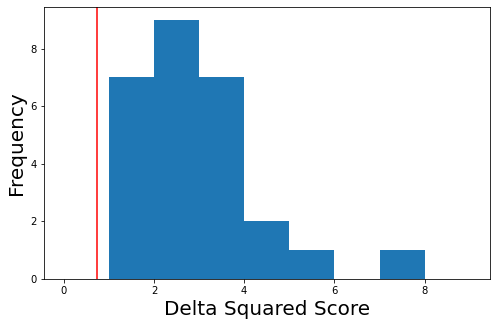

In [22]:
detscores = np.array(detscores)
print(np.mean(detscores))

fig, ax = plt.subplots(figsize = (8, 5))
ax.hist(detscores, bins = np.arange(0, 10, 1))
print(detBaseline)

ax.axvline(x = detBaseline, color = "red")
ax.set_xlabel("Delta Squared Score", size = 20)
ax.set_ylabel("Frequency", size = 20)

In [18]:
probModels = [model for model in models if not model == "CM + sigmaDet"]
n = len(probModels)
probscores = []

for i in range(n):
    for j in range(i + 1, n):
        dist1 = np.load(filebase + "\\MCMC\\"+ probModels[i] + "-main.npy")
        dist2 = np.load(filebase + "\\MCMC\\" + probModels[j] + "-main.npy")
        dscore = DS.TwoSampleTest(dist1, dist2)
        
        probscores.append(dscore)

In [29]:
print(len(probscores))
probscores = np.array(probscores)
print(np.mean(probscores))

351
1.4268789385747263


Text(0, 0.5, 'Frequency')

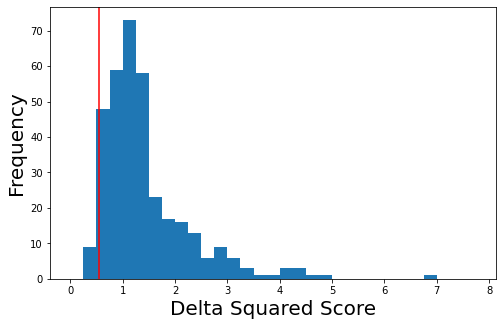

In [28]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.hist(probscores, bins = np.arange(0, 8, 0.25))
ax.axvline(x = probBaseline, color = "red")
ax.set_xlabel("Delta Squared Score", size = 20)
ax.set_ylabel("Frequency", size = 20)